In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


chest_xray
Dataset found!
['chest_xray']
(5241, 128, 128) (5241,)
(624, 128, 128) (624,)
(16, 128, 128) (16,)


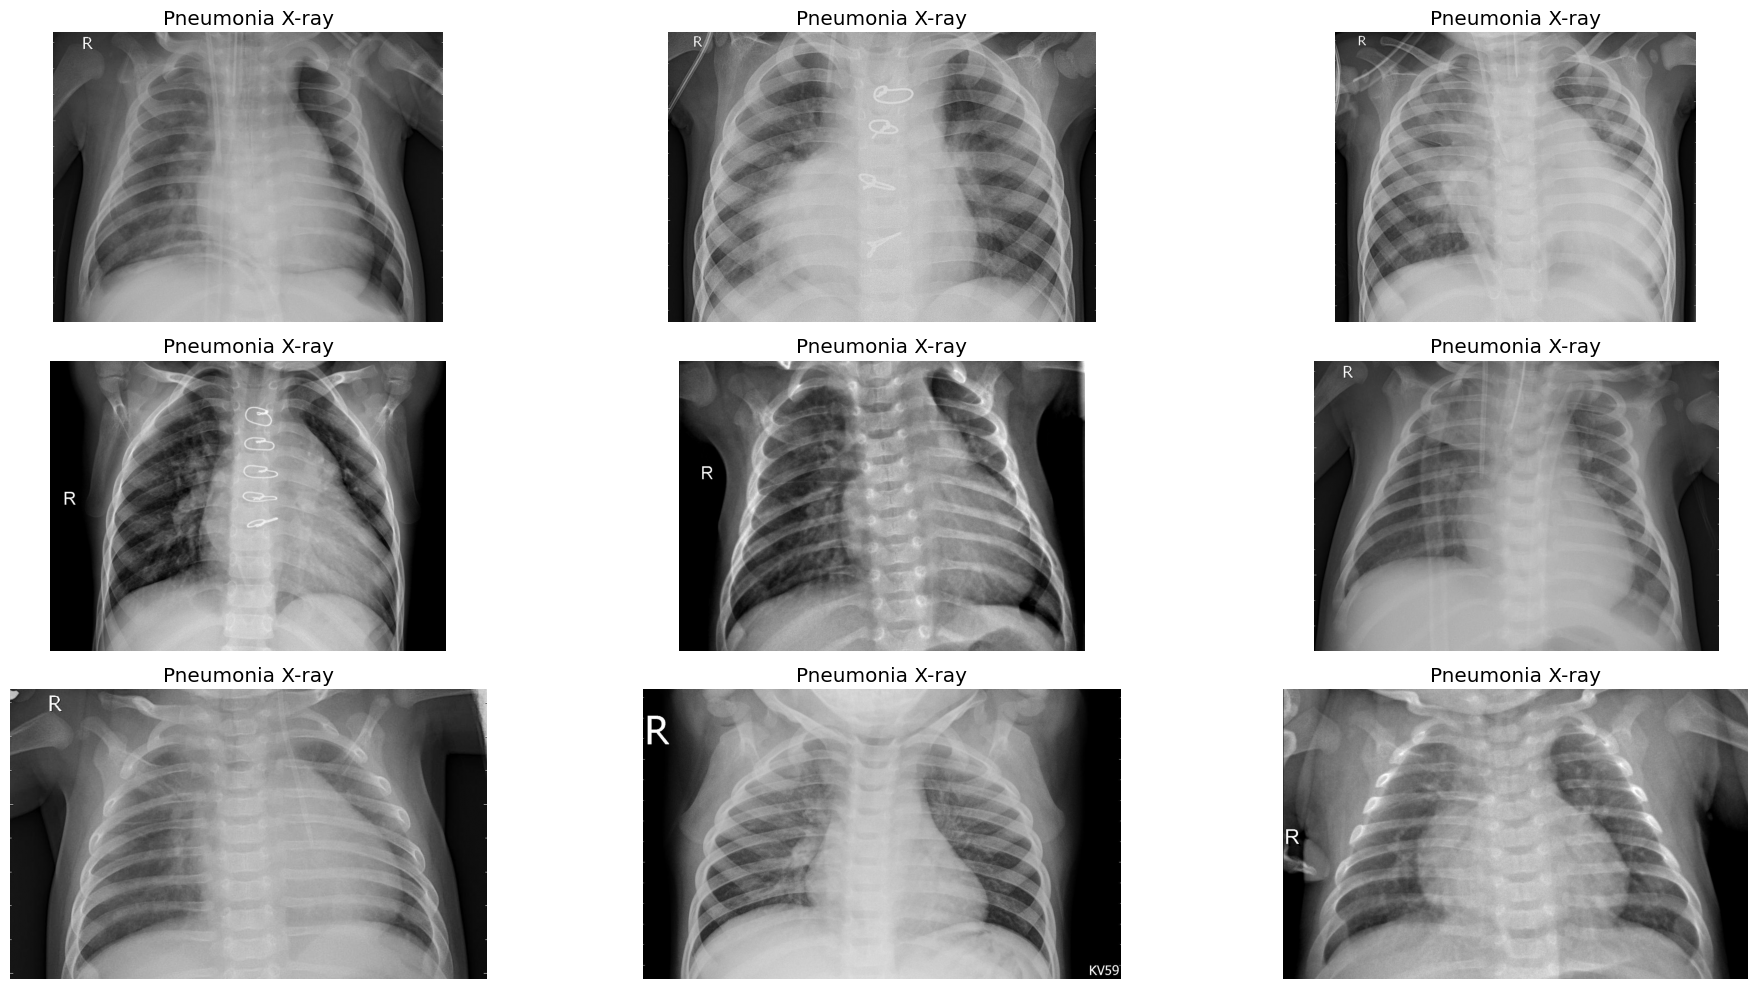

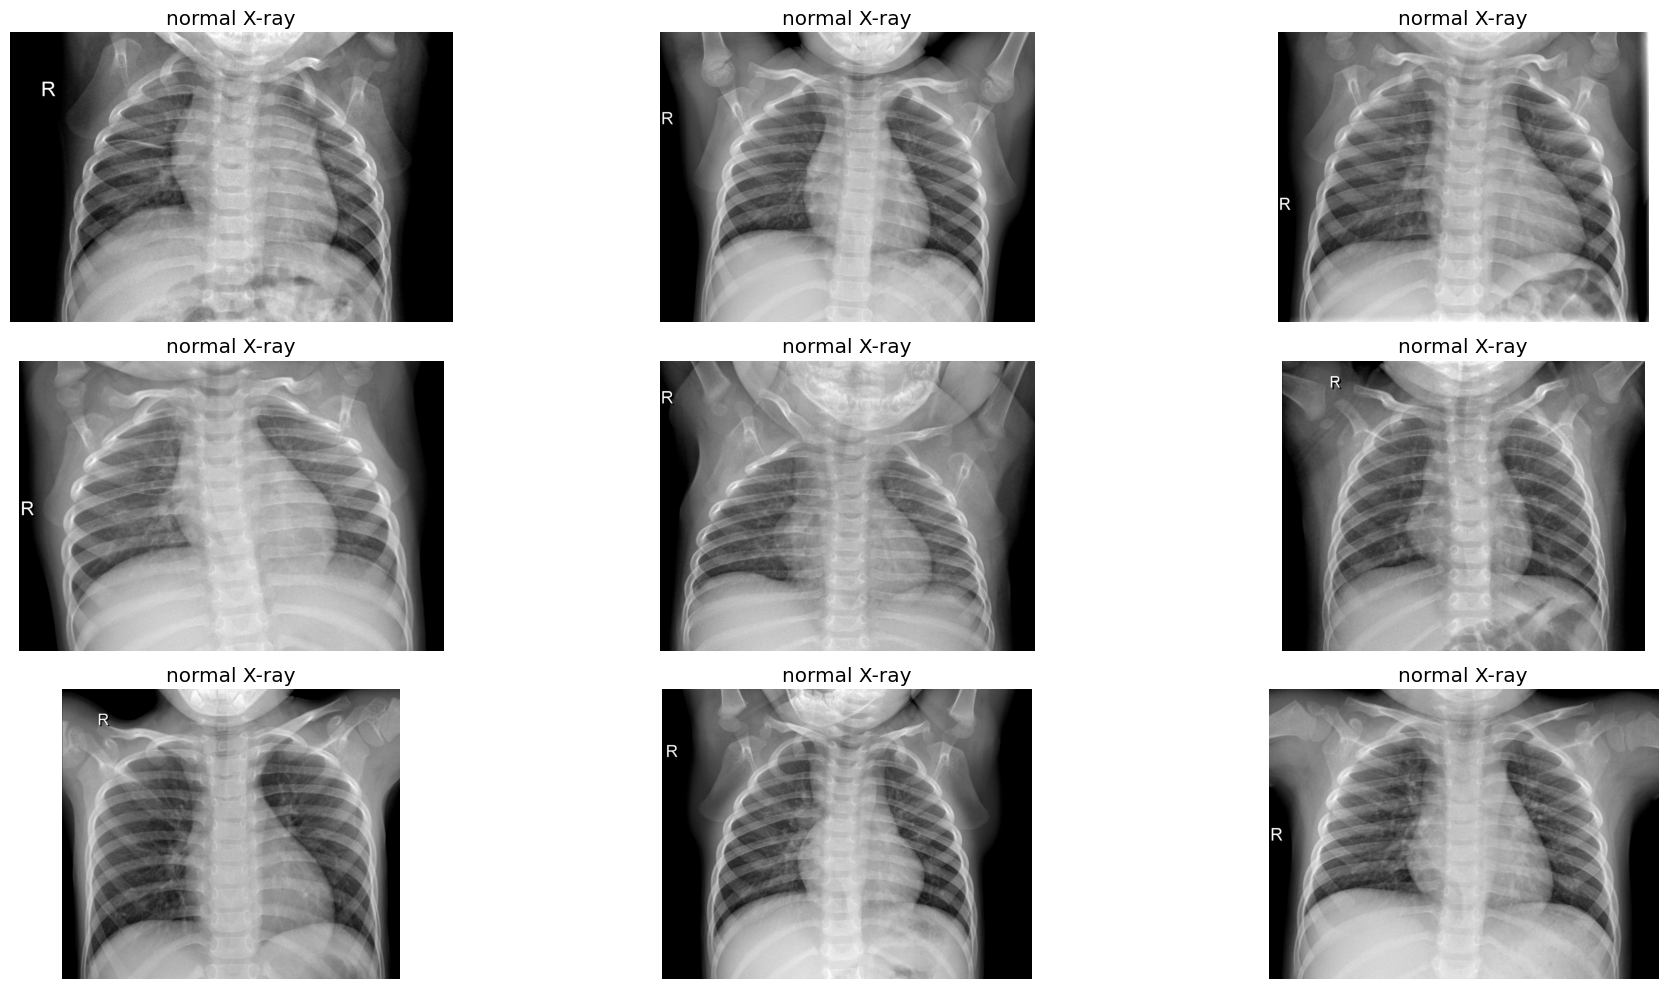

<ipython-input-2-c302833c9d30>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=listx, palette="Set2")


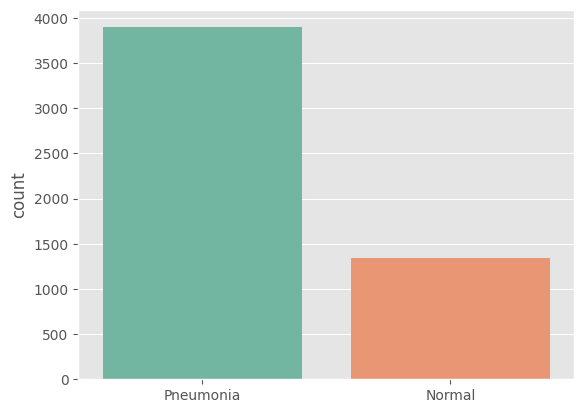

Found 5241 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten,Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

%run "/content/drive/My Drive/Colab Notebooks/DataPreprocessing.ipynb"

In [ ]:
base_model = keras.applications.xception.Xception(input_shape = (128,128,3), include_top = False)

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_1 = Dense(4608, activation='relu')(avg)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(dropout)
output = Dense(2, activation='softmax')(class_2)

for layer in base_model.layers:
    layer.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_xception = Model(inputs = base_model.input, outputs = output)
adam = Adam(learning_rate=10**-3)
model_xception.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
model_xception.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 31, 31,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add[0][0]       

 Total params: 35,615,146 (135.86 MB)

 Trainable params: 14,753,666 (56.28 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
history1 = model_xception.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=15,
    validation_data=valid_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.7246 - loss: 1.4859 - val_accuracy: 0.8125 - val_loss: 0.3871
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.8614 - loss: 0.3143 - val_accuracy: 0.7500 - val_loss: 0.4365
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.8902 - loss: 0.2703 - val_accuracy: 0.8125 - val_loss: 0.3589
Epoch 4/15
14/50 ━━━━━━━━━━━━━━━━━━━━ 1:33 3s/step - accuracy: 0.8967 - loss: 0.2562

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 740ms/step - accuracy: 0.8956 - loss: 0.2380 - val_accuracy: 0.8750 - val_loss: 0.4191
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.8994 - loss: 0.2461 - val_accuracy: 0.8125 - val_loss: 0.6843
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.8894 - loss: 0.2738 - val_accuracy: 0.8125 - val_loss: 0.4158
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.8952 - loss: 0.2543 - val_accuracy: 0.8750 - val_loss: 0.3112
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 783ms/step - accuracy: 0.8898 - loss: 0.2603 - val_accuracy: 0.8750 - val_loss: 0.3551
Epoch 9/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.8979 - loss: 0.2355 - val_accuracy: 0.8750 - val_loss: 0.3421
Epoch 10/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.9187 - loss: 0.2037 - val_accuracy: 0.8750 - val_loss: 0.3207
Epoch 11/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.9174 - loss: 0.2043 - val_accuracy: 0.8125 - val_lo

In [ ]:
for layer in model_xception.layers:
    layer.trainable = True

checkpoint = ModelCheckpoint(
    filepath='/content/Xception_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

adam = Adam(learning_rate=10**-4)
model_xception.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])

In [ ]:
history2 = model_xception.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=15,
    callbacks=[checkpoint],
    validation_data=valid_generator
)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8531 - loss: 0.3545
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to /content/Xception_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 515s 10s/step - accuracy: 0.8537 - loss: 0.3532 - val_accuracy: 0.5625 - val_loss: 2.8154
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9096 - loss: 0.2072
Epoch 2: val_accuracy did not improve from 0.56250
50/50 ━━━━━━━━━━━━━━━━━━━━ 486s 10s/step - accuracy: 0.9098 - loss: 0.2067 - val_accuracy: 0.5000 - val_loss: 3.7278
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9232 - loss: 0.1629
Epoch 3: val_accuracy did not improve from 0.56250
50/50 ━━━━━━━━━━━━━━━━━━━━ 478s 10s/step - accuracy: 0.9234 - loss: 0.1629 - val_accuracy: 0.5625 - val_loss: 2.2557
Epoch 4/15
14/50 ━━━━━━━━━━━━━━━━━━━━ 5:55 10s/step - accuracy: 0.9230 - loss: 0.1677
Epoch 4: val_accuracy did not improve from 0.56250
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9174 -

In [ ]:
xception_val_eval = model_xception.evaluate(valid_generator)
xception_test_eval = model_xception.evaluate(test_generator)
print(f"Validation Loss: {xception_val_eval[0]}")
print(f"Validation Accuracy: {xception_val_eval[1]}")
print(f"Test Loss: {xception_test_eval[0]}")
print(f"Test Accuracy: {xception_test_eval[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8125 - loss: 0.8606
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8582 - loss: 0.5839
Validation Loss: 0.8605688214302063
Validation Accuracy: 0.8125
Test Loss: 0.4847564101219177
Test Accuracy: 0.8830128312110901


In [ ]:
best_model = tensorflow.keras.models.load_model('/content/Xception_model.keras')
xception_val_eval2 = best_model.evaluate(valid_generator)
xception_test_eval2 = best_model.evaluate(test_generator)
print(f"Validation Loss: {xception_val_eval2[0]}")
print(f"Validation Accuracy: {xception_val_eval2[1]}")
print(f"Test Loss: {xception_test_eval2[0]}")
print(f"Test Accuracy: {xception_test_eval2[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8750 - loss: 0.3904
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8438 - loss: 0.3700
Validation Loss: 0.39035362005233765
Validation Accuracy: 0.875
Test Loss: 0.36326488852500916
Test Accuracy: 0.8637820482254028
